### 🎲 Monte Carlo Integration & Sampling

This project demonstrates how to use **random sampling** to approximate integrals. 

---

### 🧠 What is Monte Carlo Integration?
Estimate an integral / expectation by averaging random samples:
\[
\int_a^b f(x)\,dx \;\approx\; (b-a)\,\frac{1}{N}\sum_{i=1}^{N} f(U_i), \quad U_i \sim \mathrm{Uniform}(a,b)
\]
More generally, for a random variable \(X \sim p(x)\):
\[
\mathbb{E}[g(X)] \approx \frac{1}{N}\sum_{i=1}^{N} g(X_i), \quad X_i \sim p(x)
\]

**Why it’s useful in finance:**  
- Price options when no closed form exists (path-dependent, early-exercise).  
- Estimate Greeks via simulation (finite differences / LR / PW).  
- Compute risk measures (VaR/ES) under complex distributions.

#### Question 1:

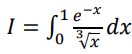

#### Part 1:
In order to evaluate I numerically using Monte Carlo integration

Let f(x) = exp(-x)/root 3 of x.

Step 1: We take n samples from the uniform distribution U(0,1)\
Step 2: We then compute the value for f(x) and multiply it by the probability of 1/n\
Step 3: We sum them all together which is the expected value of this integral.

I ~ (1-0)*Sum(f(x))*1/N

#### Part 2: Implementation of Monte Carlo Integration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# define f(x) which we want to integrate
def f_x(x):
  return (math.e**(-x)/pow(x,1/3))

# evaluate I by summing the multiple of f(x) and 1/n
def evaluate_I(samples):
  n = len(samples)
  return (sum([f_x(x) for x in samples])*1/n)

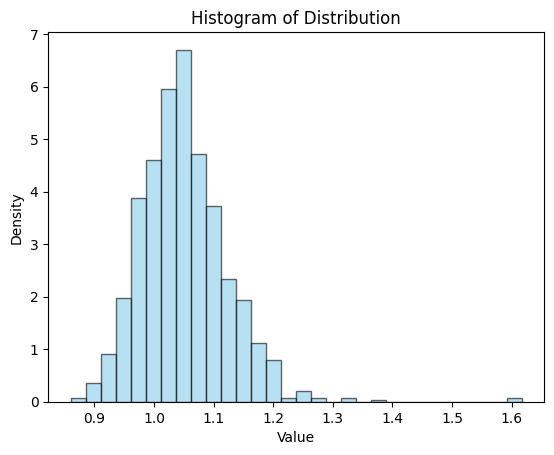

Mean: 1.0498456564283225
Population Std: 0.07316128050482604


In [2]:
results = []
n = 200

for i in range(0,1000):
  # Generate 200 random samples from Uniform(0,1)
  samples = np.random.uniform(0, 1, n)
  results.append(evaluate_I(samples))

plt.hist(results, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')
plt.title("Histogram of Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

mean = np.mean(results)
std = np.std(results)
print("Mean:", mean)
print("Population Std:", std)

#### Part 2: Explaining Results

In order to justify our results, we apply the definitions of integral below.

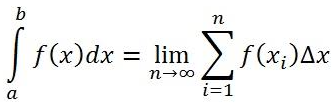

We divide the x into n segments of delta(x) and evaluate the sum of f(x)*delta(x) as n approaches infinity

In [3]:
def integrate_with_definitions(n):
  x_i = 1/n # we start with delta_x
  delta_x = 1/n

  result = 0

  for i in range(1,n+1):
    x_i = i*delta_x
    result += f_x(x_i)*delta_x

  return result

integrate_with_definitions(pow(10,6)) # n = 10000

1.0495913395725636

We see that the exact value of I -> 1.04923 as n increases. In our monte carlo integration in Part 2, the mean is around this value but there is a wide spread when we take 200 samples so it is not very accurate at n = 200

#### Part 3: Alternative Sampling from New Distribution
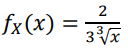

pdf(x) = 2/3*root3(x)
cdf(x) = x ^3/2

In order to evaluate I from this distribution, we do the following:

Step 1: Generate n samples from U(0,1)
Step 2: Apply inverse of Fx(x) above to the samples to generate new sample
Step 3: We compute the sum of Fx(x) for each of the new x in our new sample 
Step 4: Divide them by n

In [4]:
def inverse_f_x(x):
  return pow(x,3/2)

def evaluate_I_new(samples):
  n = len(samples)
  return 1/n * sum([3/2*math.e**-y for y in samples])

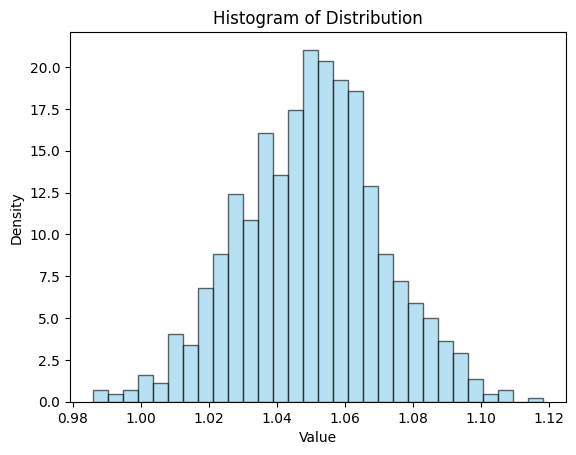

Mean: 1.05009574915337
Population Std: 0.020946589561411193


In [5]:
results = []
n = 200

for i in range(0,1000):
  # Generate 200 random samples from Uniform(0,1)
  uniform_samples = np.random.uniform(0, 1, n)
  # Convert them to the new
  new_samples = [inverse_f_x(x) for x in uniform_samples]
  # Evaluate I and and collect results
  results.append(evaluate_I_new(new_samples))

plt.hist(results, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black')
plt.title("Histogram of Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

mean = np.mean(results)
std = np.std(results)
print("Mean:", mean)
print("Population Std:", std)

#### Part 5: 

Both methods get us mean being quite close to the true value of I. But we prefer method 2:

It has much smaller standard deviation 0.02069 vs 0.06852 (3x lower)
This means that method 2 is more consistent in getting us the right value of I

#### Question 2: 
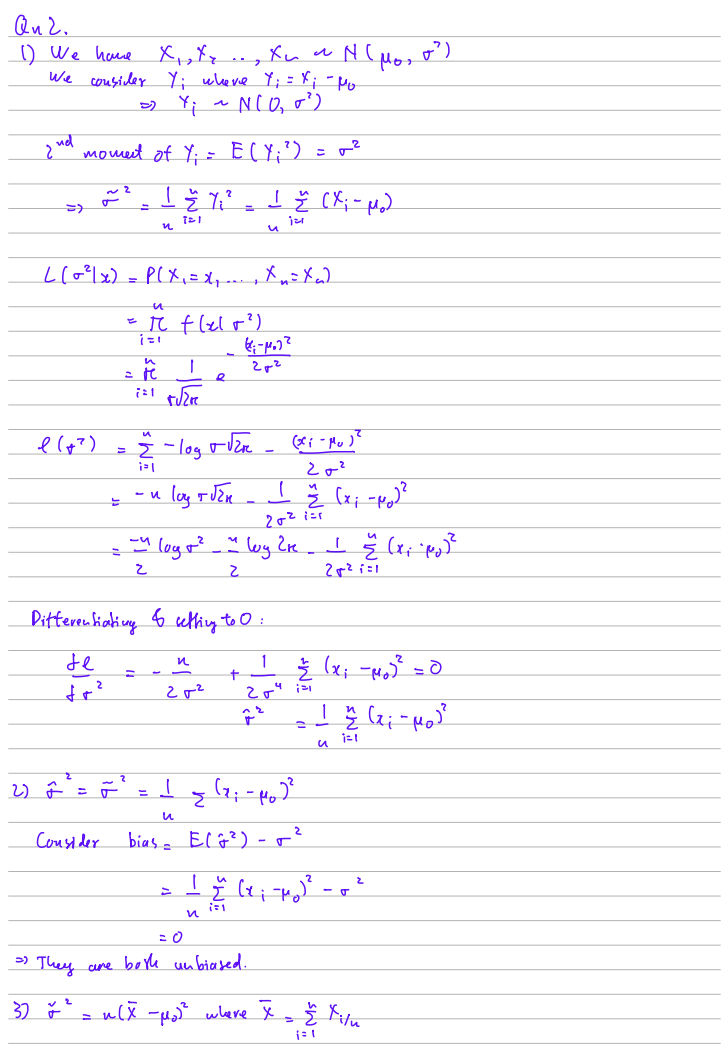

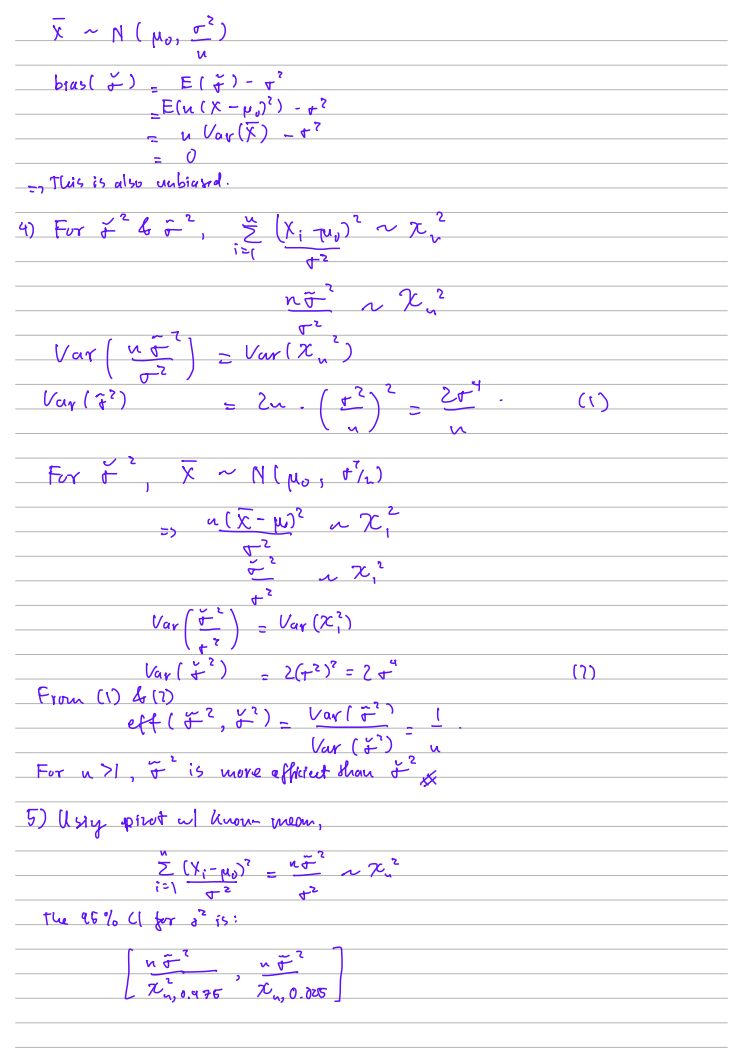

#### Part 6: Numerical Verification for Multiple Pivots 

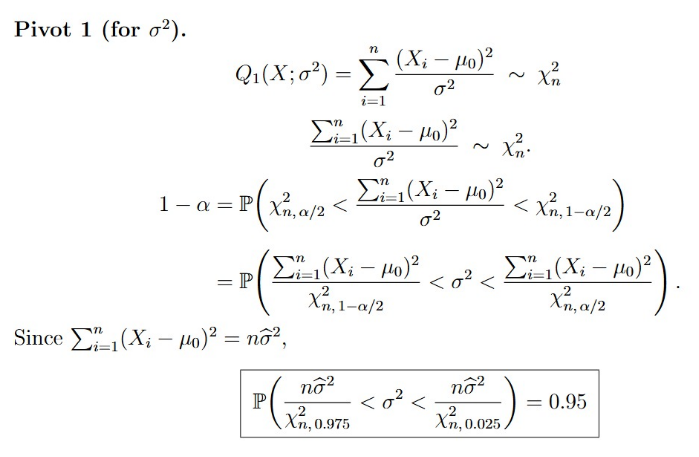

In [6]:
# Parameters
n = 100
mu0 = 40.0
sigma_true = 40.0

# Generate samples
samples = np.random.normal(mu0, sigma_true, n)

In [7]:
from scipy.stats import chi2

def ci_sigma2_known_mu(samples, mu0, alpha=0.05):
    """
    Equal-tailed (1-α) CI for σ² when Xi ~ N(μ0, σ²) and μ0 is known.
    Uses the pivot:  sum (Xi-μ0)^2 / σ²  ~ χ²_n
    """
    samples = np.asarray(samples)
    n = len(samples)
    S0 = np.sum((samples - mu0)**2)                 # numerator
    q_lo = chi2.ppf(alpha/2, df=n)            # χ²_{α/2, n}
    q_hi = chi2.ppf(1 - alpha/2, df=n)        # χ²_{1-α/2, n}
    lo = S0 / q_hi
    hi = S0 / q_lo
    # Optional: CI for σ by taking square roots
    return (lo, hi), (np.sqrt(lo), np.sqrt(hi))

(ci_lo, ci_hi), (s_lo, s_hi) = ci_sigma2_known_mu(samples, mu0, alpha=0.05)
print(f"95% CI for σ²: [{ci_lo:.4f}, {ci_hi:.4f}]")
print(f"95% CI for σ : [{s_lo:.4f}, {s_hi:.4f}]")

95% CI for σ²: [1138.2126, 1986.8548]
95% CI for σ : [33.7374, 44.5741]


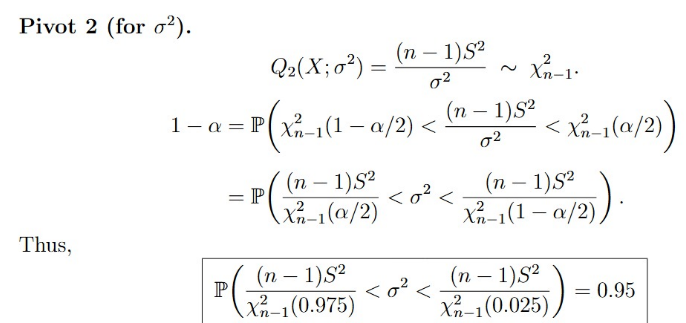

In [8]:
def ci_sigma2_unknown_mu(samples, alpha=0.05):
    """
    Equal-tailed (1-α) CI for σ² when Xi ~ N(μ0, σ²) and μ0 is known.
    Uses the pivot:  sum (Xi-μ0)^2 / σ²  ~ χ²_n
    """
    samples = np.asarray(samples)
    n = len(samples)
    #(n-1)S^2
    numerator = (n-1)*np.var(samples, ddof=1)
    q_lo = chi2.ppf(alpha/2, df=n-1)            # χ²_{α/2, n-1}
    q_hi = chi2.ppf(1 - alpha/2, df=n-1)        # χ²_{1-α/2, n-1}
    lo = numerator / q_hi
    hi = numerator / q_lo
    # Optional: CI for σ by taking square roots
    return (lo, hi), (np.sqrt(lo), np.sqrt(hi))

(ci_lo, ci_hi), (s_lo, s_hi) = ci_sigma2_unknown_mu(samples, alpha=0.05)
print(f"95% CI for σ²: [{ci_lo:.4f}, {ci_hi:.4f}]")
print(f"95% CI for σ : [{s_lo:.4f}, {s_hi:.4f}]")

95% CI for σ²: [1071.9248, 1876.4543]
95% CI for σ : [32.7403, 43.3181]


In [9]:
def ci_sigma2_mean_pivot(samples, mu, alpha=0.05):
    """
    Equal-tailed (1-α) CI for σ² using the pivot
        Q3 = n*(Xbar - μ)^2 / σ²  ~  χ²_1
    Requires known μ (or a hypothesized μ).

    Returns:
      (lo, hi) for σ², and (lo_s, hi_s) for σ.
    Notes:
      - This CI uses only the information in the sample mean, so it is
        typically much wider (inefficient) compared to variance-based pivots.
    """
    x = np.asarray(samples, dtype=float)
    n = x.size
    xbar = x.mean()

    numerator = n * (xbar - mu)**2
    q_lo = chi2.ppf(alpha/2, df=1)          # χ²_{α/2,1}
    q_hi = chi2.ppf(1 - alpha/2, df=1)      # χ²_{1-α/2,1}

    # CI for σ²: ( numerator / χ²_{1-α/2,1} , numerator / χ²_{α/2,1} )
    lo = numerator / q_hi
    hi = numerator / q_lo

    return (lo, hi), (np.sqrt(lo), np.sqrt(hi))
(ci_lo, ci_hi), (s_lo, s_hi) = ci_sigma2_mean_pivot(samples, mu=mu0, alpha=0.05)
print(f"95% CI for σ²: [{ci_lo:.4f}, {ci_hi:.4f}]")
print(f"95% CI for σ : [{s_lo:.4f}, {s_hi:.4f}]")

95% CI for σ²: [1952.5681, 9988584.0538]
95% CI for σ : [44.1879, 3160.4721]


                      coverage_rate    avg_length  median_length
pivot                                                           
Pivot 1 (known mu0)            0.94  9.286122e+02   9.044488e+02
Pivot 2 (unknown mu)           0.94  9.295501e+02   9.043142e+02
Pivot 3 (mean-based)           0.94  2.356032e+06   1.344248e+06


<Figure size 700x500 with 0 Axes>

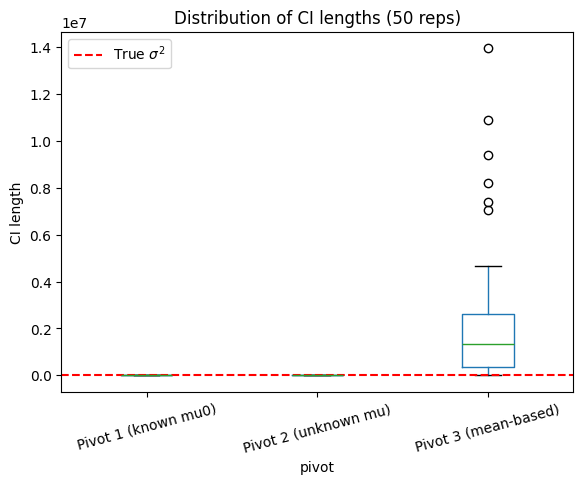

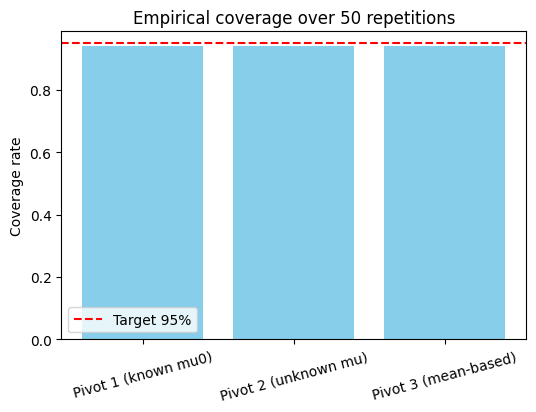

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# True values
sigma2_true = sigma_true**2
alpha = 0.05
R = 50  # number of repetitions

rows = []

for r in range(R):
    # (a) simulate new sample
    samples = np.random.normal(mu0, sigma_true, n)

    # (b) compute all three CIs
    pivots = {
        "Pivot 1 (known mu0)": ci_sigma2_known_mu(samples, mu0, alpha)[0],
        "Pivot 2 (unknown mu)": ci_sigma2_unknown_mu(samples, alpha)[0],
        "Pivot 3 (mean-based)": ci_sigma2_mean_pivot(samples, mu0, alpha)[0]
    }

    for name, (lo, hi) in pivots.items():
        cover = (lo <= sigma2_true <= hi)
        length = hi - lo
        rows.append({
            "rep": r+1,
            "pivot": name,
            "lo": lo,
            "hi": hi,
            "length": length,
            "covers_true": int(cover)
        })

# Save into DataFrame
df = pd.DataFrame(rows)

# Summarize
summary = (
    df.groupby("pivot")
      .agg(
          coverage_rate=("covers_true", "mean"),
          avg_length=("length", "mean"),
          median_length=("length", "median")
      )
)
print(summary)

# Boxplot of CI lengths
plt.figure(figsize=(7,5))
df.boxplot(column="length", by="pivot", grid=False)
plt.axhline(sigma2_true, color="red", linestyle="--", label=r"True $\sigma^2$")
plt.ylabel("CI length")
plt.title("Distribution of CI lengths (50 reps)")
plt.suptitle("")
plt.xticks(rotation=15)
plt.legend()
plt.show()

# Bar chart of coverage rates
plt.figure(figsize=(6,4))
plt.bar(summary.index, summary["coverage_rate"], color="skyblue")
plt.axhline(1-alpha, color="red", linestyle="--", label=f"Target {1-alpha:.0%}")
plt.ylabel("Coverage rate")
plt.title("Empirical coverage over 50 repetitions")
plt.xticks(rotation=15)
plt.legend()
plt.show()